In [1]:
# Make module from local packages importable
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [18]:
import numpy as np
import matplotlib.pyplot as plt

## Compare confusion matrices

In [24]:
# Path to sumatra records
data_path = "../data"
# Records we want to compare
record_labels = ["20180507-101926", "20180507-105329"]
titles = ["lambda_w=0", "js, lambda_o=1"]
fig_name = "JS_regularization_vs_baseline_confusion_train_2000.pdf"
# Epoch to compare
epoch = 15
n_classes = 10

In [39]:
def plot_confusion_matrix(cm):
    marks = list(range(n_classes))
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.xticks(marks)
    plt.yticks(marks)
    plt.colorbar(fraction=0.04)

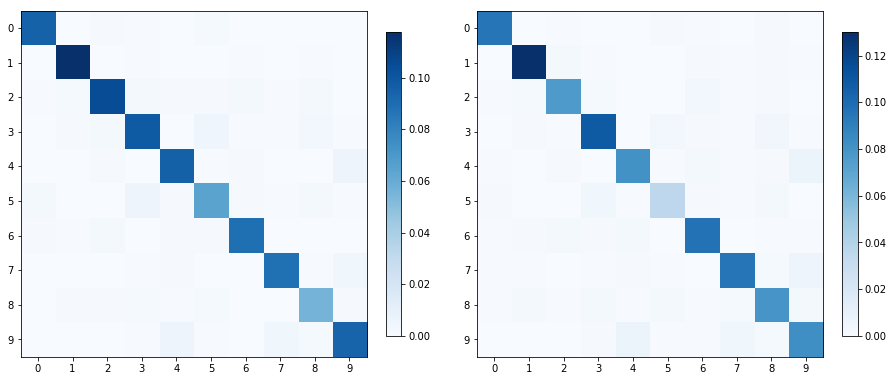

In [44]:
rows = 1
columns = 2
fig = plt.figure(figsize=(15,15))
for i, label in enumerate(record_labels):
    fig.add_subplot(rows, columns, i + 1)
    path = os.path.join(data_path, label, "confusion", "confusion_" + str(epoch - 1) + ".npy")
    cm = np.load(path)
    cm = cm / np.sum(cm)
    # cm = np.abs(cm - 1)
    plot_confusion_matrix(cm, titles[i])
plt.tight_layout()
plt.savefig(fig_name)

## Off-Diagonal Percentage

In [42]:
for label in record_labels:
    path = os.path.join(data_path, label, "confusion", "confusion_" + str(epoch - 1) + ".npy")
    cm = np.load(path)
    s = np.sum(cm)
    I = np.eye(n_classes, n_classes)
    diag = cm * I
    diag_s = np.sum(diag)
    off_diag_percentage = (s - diag_s) / s
    print("Off-diagonal percentage for {} is {}".format(label, off_diag_percentage))

Off-diagonal percentage for 20180504-080959-debug is 0.097
Off-diagonal percentage for 20180504-080533-debug is 0.1183
